In [ ]:
import json 
import pandas as pd
import os
import warnings
warnings.filterwarnings('ignore')
from langdetect import detect
import numpy as np
from deep_translator import GoogleTranslator
import nltk
from nltk import pos_tag, word_tokenize
from nltk.corpus import stopwords 
import string
import regex as re
from sklearn import model_selection
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import cufflinks as cf 
import plotly.express as px
import spacy
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud
nlp = spacy.load('en_core_web_sm')
doc = nlp('Apple focuses on ml')

In [ ]:
'''
years = [d for d in os.listdir('./datasets')]

def open_data(dir, dfs):
  for year in years: 
  
      try:  
        with open(f'{dir}/{year}','r') as file:
          data=json.load(file)
        df = pd.json_normalize(data)
        dfs.append(df)

      except json.JSONDecodeError as e:
        print(f"Error reading {year}: {e}")

dfs=[]
open_data('datasets')
dfs = pd.concat(dfs,ignore_index=True)
dfs = dfs.drop_duplicates(subset = 'id')
dfs.to_csv('github_data.csv', index = False)
'''


In [ ]:
# Because some descriptions are in different languages, I translated them first.  
# And also, the translation took a lot of time so I stored it to a different file named 'github_data_trans.csv' 
''' 
full_data = pd.read_csv("github_data.csv")
data = full_data[['created_at','full_name','description','watchers_count','size','stargazers_count','forks_count','open_issues_count',
           'language', 'owner.organizations_url']]
data = data.dropna(subset='language').reset_index(drop=True)

def translate_func(text):
  try:
    translator = GoogleTranslator(source='auto', target='en')
    return translator.translate(text)
  except:
    return np.nan
data['description_translated'] = data['description'].apply(lambda x: translate_func(str(x)))
data.to_csv('github_data_trans.csv')
'''

In [ ]:
translated_data = pd.read_csv('github_data_trans.csv')
translated_data.drop(columns = ['lang','stargazers_count'], inplace=True)
null_idxes = translated_data[translated_data.isnull().any(axis=1)].index

In [ ]:
org_data = pd.read_csv('github_data.csv')
for null_idx in null_idxes:
  translated_data.loc[null_idx] = translated_data.loc[null_idx].fillna(org_data.loc[null_idx])

In [ ]:
df = translated_data.copy()


In [ ]:
df

,created_at,full_name,description,watchers_count,size,forks_count,open_issues_count,language,owner.organizations_url,description_translated
0,2018-02-12T19:30:10Z,Pierian-Data/Complete-Python-3-Bootcamp,Course Files for Complete Python 3 Bootcamp Co...,26595.0,37125.0,83787.0,223.0,Jupyter Notebook,https://api.github.com/users/Pierian-Data/orgs,Course Files for Complete Python 3 Bootcamp Co...
1,2018-03-01T16:05:52Z,jackfrued/Python-100-Days,Python - 100天从新手到大师,151497.0,332089.0,51500.0,715.0,Python,https://api.github.com/users/jackfrued/orgs,Python - From Novice to Master in 100 Days
2,2018-05-07T13:27:00Z,Snailclimb/JavaGuide,「Java学习+面试指南」一份涵盖大部分 Java 程序员所需要掌握的核心知识。准备 Jav...,144220.0,176135.0,45355.0,60.0,Java,https://api.github.com/users/Snailclimb/orgs,"""Java Learning + Interview Guide"" covers the c..."
3,2018-03-24T07:47:04Z,trekhleb/javascript-algorithms,📝 Algorithms and data structures implemented i...,184385.0,13248.0,29758.0,353.0,JavaScript,https://api.github.com/users/trekhleb/orgs,📝 Algorithms and data structures implemented i...
4,2018-04-04T01:11:44Z,macrozheng/mall,mall项目是一套电商系统，包括前台商城系统及后台管理系统，基于SpringBoot+MyB...,76071.0,58662.0,28435.0,30.0,Java,https://api.github.com/users/macrozheng/orgs,"The mall project is an e-commerce system, incl..."
...,...,...,...,...,...,...,...,...,...,...
23267,2023-01-27T18:22:42Z,Stirling-Tools/Stirling-PDF,#1 Locally hosted web application that allows ...,28570.0,66088.0,2043.0,193.0,Java,https://api.github.com/users/Stirling-Tools/orgs,#1 Locally hosted web application that allows ...
23268,2023-12-18T10:59:18Z,mouredev/roadmap-retos-programacion,Ruta de estudio basada en ejercicios de código...,2724.0,32268.0,2042.0,16.0,Python,https://api.github.com/users/mouredev/orgs,Study path based on weekly code exercises in 2...
23269,2023-04-06T21:16:41Z,microsoft/sample-app-aoai-chatGPT,Sample code for a simple web chat experience t...,1341.0,83253.0,2039.0,237.0,Python,https://api.github.com/users/microsoft/orgs,Sample code for a simple web chat experience t...
23270,2023-03-07T18:24:17Z,LinkedInLearning/sql-for-data-analysis-3271025,This is a repository for the LinkedIn Learning...,130.0,3686.0,2067.0,10.0,Jupyter Notebook,https://api.github.com/users/LinkedInLearning/...,This is a repository for the LinkedIn Learning...


In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\songt\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Preprocess the dataset 
class Preprocessor():
  def __init__(self, data):
    self.data = data 

  def clean(self, txt):
    try:
      # Tokenize text
      tokens = word_tokenize(txt)
      # Convert to lowercase
      clean_txt =  [token.lower() for token in tokens]
      # Remove stopwords
      custom_stopwords = ['project', 'code', 'tool', 'app', 'open source', 'repository','server','support', 'use', 'build', 'application']
      stop_words = stopwords.words('english')
      stop_words.extend(custom_stopwords)
      clean_txt = [token for token in clean_txt if token not in stop_words]
      # Remove punctuation
      puncts = list(string.punctuation)
      clean_txt = [token for token in clean_txt if token not in puncts]
      # Combine tokens into a single string
      combined_text = ' '.join(clean_txt)

      return combined_text
    except:
      return np.nan
    
  def extract_name(self, full_name):
    # Extract name from full_name
    match = re.search(r'./(?P<name>[^.]+)', full_name)
    if match:
      return match.group('name')
    else:
      return None
  
  def extract_org(self, url):
    # Extract organization from URL
    match = re.search(r'/users/(?P<org>[^.]+)/orgs', url)
    if match:
      return match.group('org')
    else:
      return None
    
  def handle_fullname(self, fullname):
    # Handle fullname by replacing hyphens with spaces
    try:
      return (' ').join(fullname.split('-'))
    except:
      return np.nan
    
  def run(self):
    # Process and clean the data
    self.data['org_name'] = self.data['owner.organizations_url'].apply(self.extract_org) 
    self.data['org_name'] = self.data['owner.organizations_url'].apply(self.clean) 

    self.data['full_name_clean'] = self.data['full_name'].apply(self.extract_name)
    self.data['full_name_clean'] = self.data['full_name_clean'].apply(self.handle_fullname)
    self.data['full_name_clean'] = self.data['full_name_clean'].apply(self.clean)

    self.data['description_translated_clean'] = self.data['description_translated'].apply(self.clean)
    return self.data
  
  def get_documents(self):
    # Generate documents from processed data
    self.data['org_name'] = self.data['owner.organizations_url'].apply(self.extract_org) 
    org_docs = self.data['org_name'].apply(self.clean).dropna().to_list()
    self.data['full_name'] = self.data['full_name'].apply(self.extract_name)

    name_docs = self.data['full_name'].apply(self.handle_fullname).dropna().to_list()
    desc_docs = self.data['description_translated'].apply(self.clean).dropna().to_list()
    return name_docs, desc_docs, org_docs    


# Instantiate and run the preprocessor
preprocessor = Preprocessor(df)
data = preprocessor.run()

# Get the cleaned documents
name_docs, desc_docs, org_docs = preprocessor.get_documents()


In [ ]:
data

,created_at,full_name,description,watchers_count,size,forks_count,open_issues_count,language,owner.organizations_url,description_translated,org_name,full_name_clean,description_translated_clean
0,2018-02-12T19:30:10Z,Complete-Python-3-Bootcamp,Course Files for Complete Python 3 Bootcamp Co...,26595.0,37125.0,83787.0,223.0,Jupyter Notebook,https://api.github.com/users/Pierian-Data/orgs,Course Files for Complete Python 3 Bootcamp Co...,Pierian-Data,Complete Python 3 Bootcamp,course files complete python 3 bootcamp course...
1,2018-03-01T16:05:52Z,Python-100-Days,Python - 100天从新手到大师,151497.0,332089.0,51500.0,715.0,Python,https://api.github.com/users/jackfrued/orgs,Python - From Novice to Master in 100 Days,jackfrued,Python 100 Days,python novice master 100 days
2,2018-05-07T13:27:00Z,JavaGuide,「Java学习+面试指南」一份涵盖大部分 Java 程序员所需要掌握的核心知识。准备 Jav...,144220.0,176135.0,45355.0,60.0,Java,https://api.github.com/users/Snailclimb/orgs,"""Java Learning + Interview Guide"" covers the c...",Snailclimb,JavaGuide,`` java learning interview guide '' covers cor...
3,2018-03-24T07:47:04Z,javascript-algorithms,📝 Algorithms and data structures implemented i...,184385.0,13248.0,29758.0,353.0,JavaScript,https://api.github.com/users/trekhleb/orgs,📝 Algorithms and data structures implemented i...,trekhleb,javascript algorithms,📝 algorithms data structures implemented javas...
4,2018-04-04T01:11:44Z,mall,mall项目是一套电商系统，包括前台商城系统及后台管理系统，基于SpringBoot+MyB...,76071.0,58662.0,28435.0,30.0,Java,https://api.github.com/users/macrozheng/orgs,"The mall project is an e-commerce system, incl...",macrozheng,mall,mall e-commerce system including front-end mal...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23267,2023-01-27T18:22:42Z,Stirling-PDF,#1 Locally hosted web application that allows ...,28570.0,66088.0,2043.0,193.0,Java,https://api.github.com/users/Stirling-Tools/orgs,#1 Locally hosted web application that allows ...,Stirling-Tools,Stirling PDF,1 locally hosted web application allows perfor...
23268,2023-12-18T10:59:18Z,roadmap-retos-programacion,Ruta de estudio basada en ejercicios de código...,2724.0,32268.0,2042.0,16.0,Python,https://api.github.com/users/mouredev/orgs,Study path based on weekly code exercises in 2...,mouredev,roadmap retos programacion,study path based weekly exercises 2024 mourede...
23269,2023-04-06T21:16:41Z,sample-app-aoai-chatGPT,Sample code for a simple web chat experience t...,1341.0,83253.0,2039.0,237.0,Python,https://api.github.com/users/microsoft/orgs,Sample code for a simple web chat experience t...,microsoft,sample app aoai chatGPT,sample simple web chat experience azure openai...
23270,2023-03-07T18:24:17Z,sql-for-data-analysis-3271025,This is a repository for the LinkedIn Learning...,130.0,3686.0,2067.0,10.0,Jupyter Notebook,https://api.github.com/users/LinkedInLearning/...,This is a repository for the LinkedIn Learning...,LinkedInLearning,sql for data analysis 3271025,linkedin learning course sql data analysis


In [ ]:
def get_top_n_gram(corpus, ngram_range, n=None):
    # Initialize the TfidfVectorizer with the specified n-gram range and stop words
    vec = TfidfVectorizer(ngram_range=ngram_range, stop_words='english').fit(corpus)
    
    # Transform the corpus into a bag-of-words model
    bag_of_words = vec.transform(corpus)
    
    # Sum the TF-IDF scores for each word across all documents
    sum_words = bag_of_words.sum(axis=0)
    
    # Extract the words and their corresponding sum of TF-IDF scores
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    
    # Sort the words by their frequency in descending order
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    
    # Return the top 'n' most frequent words or phrases
    return words_freq[:n]

In [ ]:
data.columns

Index(['created_at', 'full_name', 'description', 'watchers_count', 'size',
       'forks_count', 'open_issues_count', 'language',
       'owner.organizations_url', 'description_translated', 'org_name',
       'full_name_clean', 'description_translated_clean'],
      dtype='object')

In [ ]:
description_translated_clean =  data.description_translated_clean.dropna()

In [ ]:
# Get top 10 bigrams from the cleaned text data
bigrams = get_top_n_gram(description_translated_clean, (2, 2), 10)

# Create a DataFrame with bigrams and their counts
df1 = pd.DataFrame(bigrams, columns=['Text', 'count'])

# Group by text and sum counts, then sort by count in ascending order
df1 = df1.groupby('Text').sum().sort_values(by='count', ascending=True)

# Create a horizontal bar plot for the top 20 bigrams
fig = px.bar(df1, 
             y=df1.index, 
             x='count', 
             labels={'x': 'Count', 'bigrams': 'Bigrams'},
             title='Top 20 Bigrams',
             color='count',   
             color_continuous_scale='ylgn',  
             orientation='h' 
            )

# Update layout: set dimensions, title alignment, and axis titles
fig.update_layout(
    width=800,  
    height=600,  
    title={'x': 0.5, 'xanchor': 'center', 'yanchor': 'top'},  
    xaxis_title='Count',
    yaxis_title='Bigrams',
    plot_bgcolor='rgb(34, 34, 34)',   # Set plot background color
    paper_bgcolor='rgb(34, 34, 34)',  # Set paper background color
    font=dict(
        family="Arial, sans-serif",
        size=12,
        color="White"  # Set font color
    )
)

# Update color axes: customize the colorbar appearance
fig.update_coloraxes(colorbar=dict(
    title='Count',
    titlefont=dict(color='white'),   # Set colorbar title font color
    tickfont=dict(color='white')     # Set colorbar tick font color
))

# Update trace: add black border around bars
fig.update_traces(marker_line_color='black', marker_line_width=1)

# Show the figure
fig.show()


(-0.5, 599.5, 399.5, -0.5)

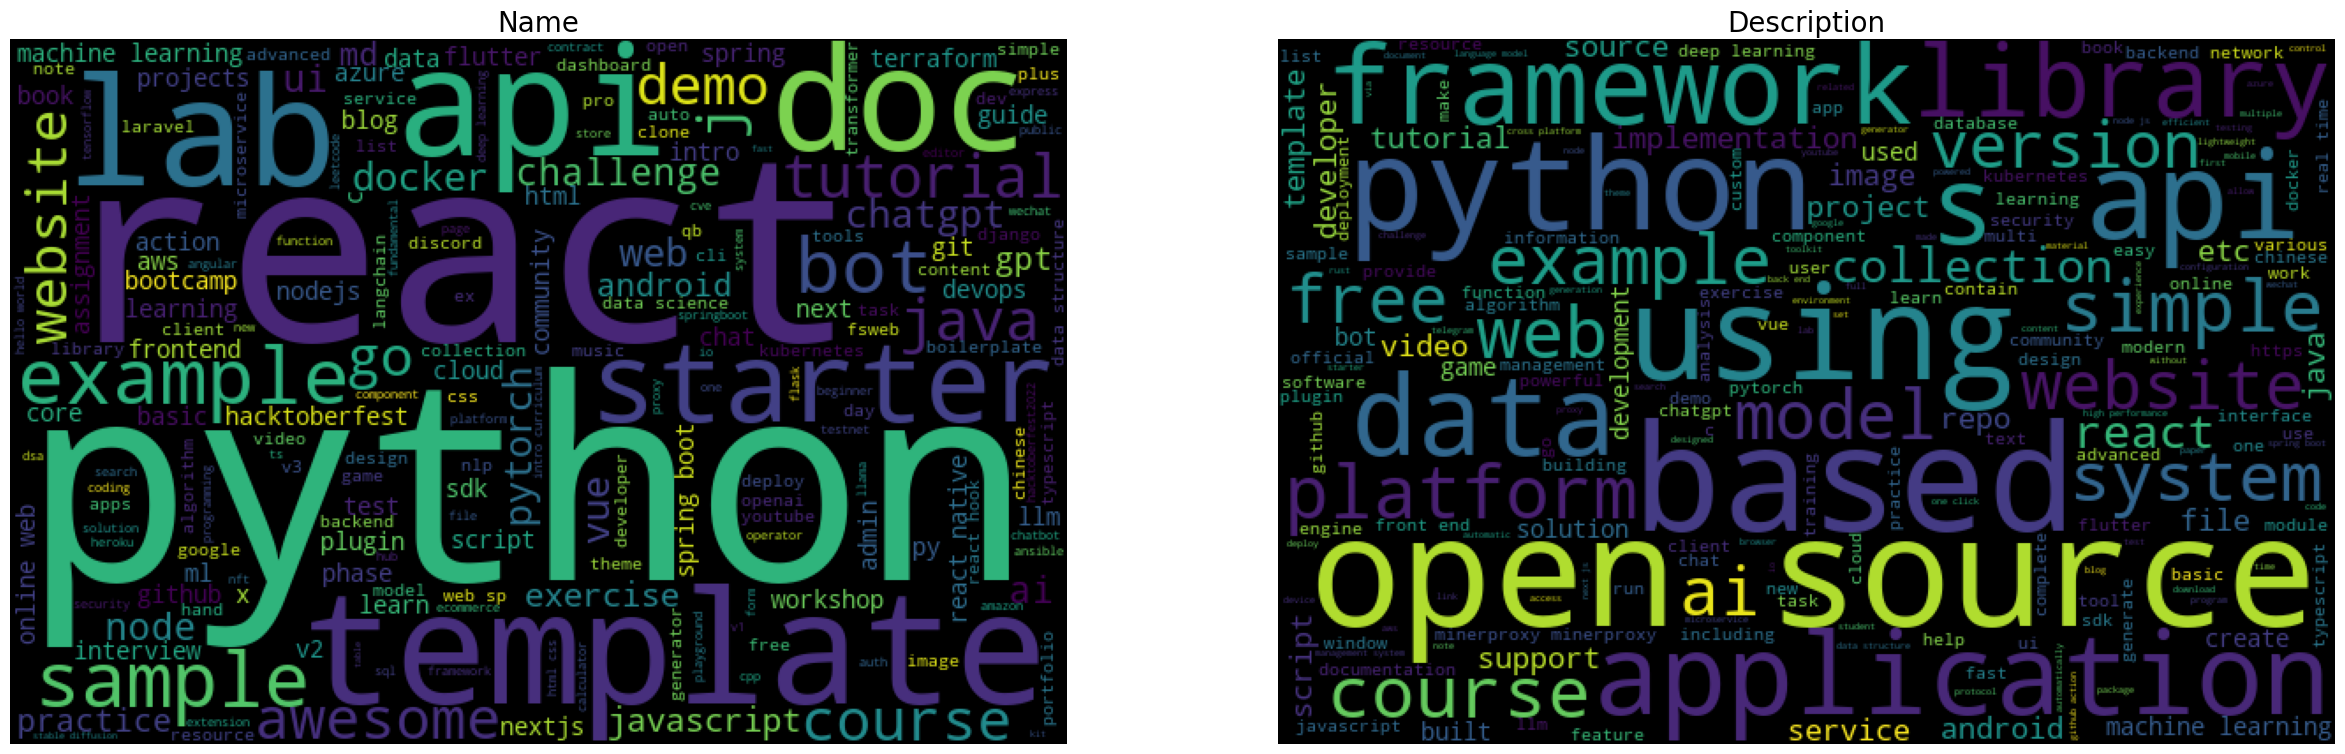

In [ ]:
# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[30, 15])

# Generate word cloud for 'full_name_clean' column
wordcloud1 = WordCloud(background_color='black',
                       width=600, 
                       height=400).generate(' '.join(data['full_name_clean'].dropna()))
ax1.imshow(wordcloud1)   
ax1.axis('off')   
ax1.set_title('Name', fontsize=20)   

# Generate word cloud for 'description_translated_clean'
wordcloud2 = WordCloud(background_color='black',
                       width=600, 
                       height=400).generate(' '.join(description_translated_clean))
ax2.imshow(wordcloud2)   
ax2.axis('off')  
ax2.set_title('Description', fontsize=20)   


In [ ]:
dx = pd.DataFrame(df.groupby(['language',df.index.year])['language'].count())
dx 

language
language   created_at          
ABAP       2021               2
           2022               1
AGS Script 2020               2
AL         2023               1
ASL        2019               1
...                         ...
YARA       2023               1
Zeek       2023               1
ZenScript  2018               1
Zig        2020               1
           2021               1

[476 rows x 1 columns]

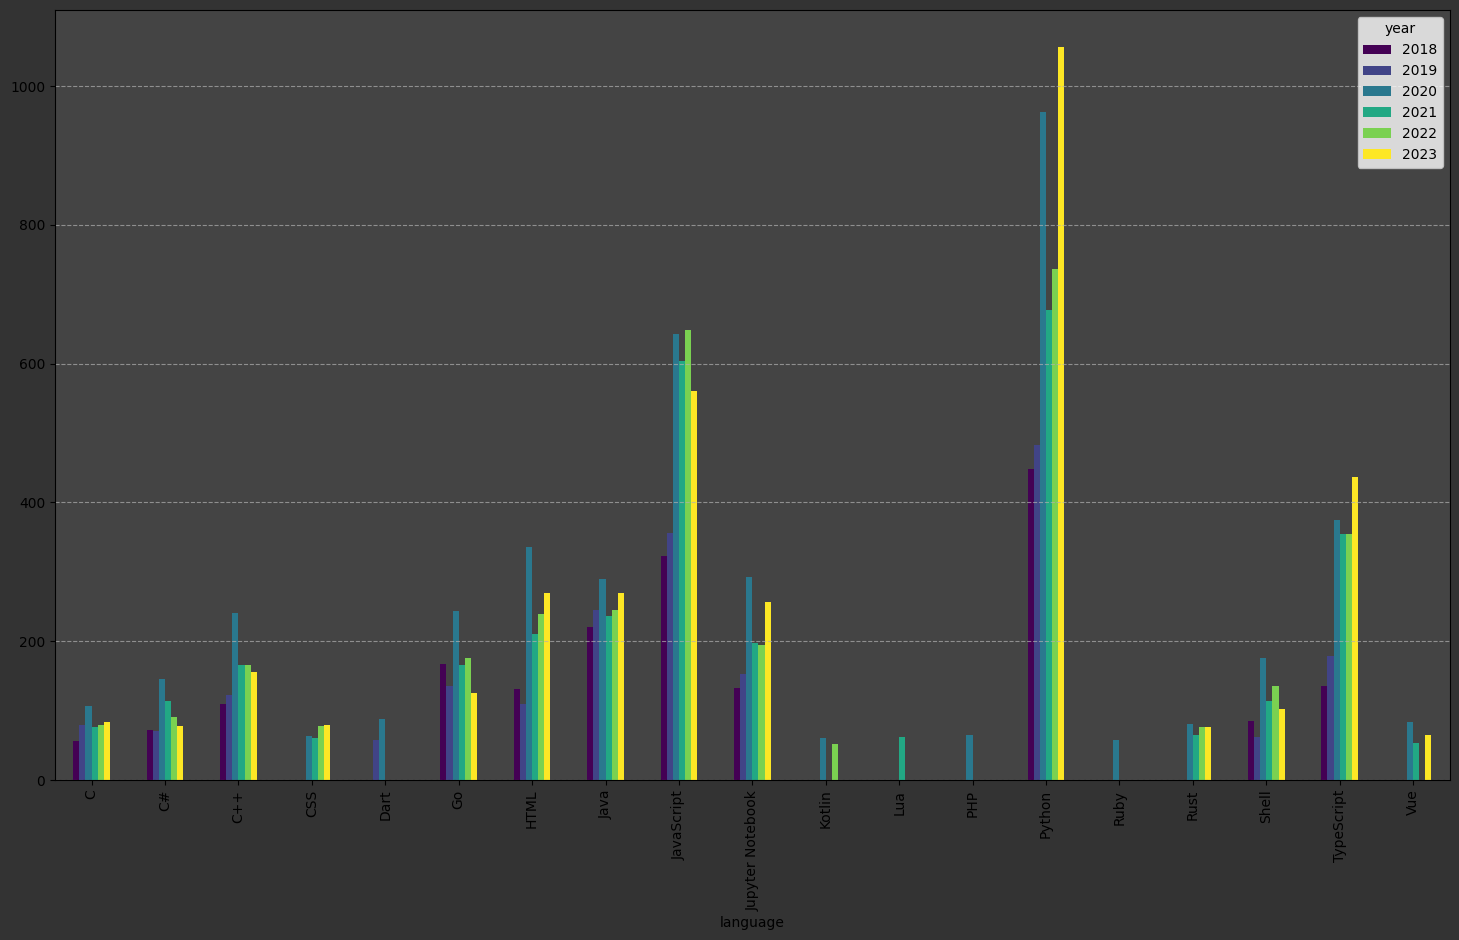

In [ ]:
data['created_at'] = data['created_at'].apply(pd.to_datetime)
df = data[data['created_at']<'2024'].set_index(['created_at'])
fig, ax = plt.subplots(figsize = (18,10))
dx = pd.DataFrame(df.groupby(['language',df.index.year])['language'].count())
dx_100 = dx[dx['language']>50]
dx_100.unstack().plot(kind='bar', ax=ax, colormap='viridis')
# Set background color
fig.patch.set_facecolor('#333333')  # Dark gray background for the figure
ax.set_facecolor('#444444')  # Slightly lighter background for the plot area

# Add gridlines
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.legend(['2018','2019','2020','2021','2022','2023'], title = 'year')
plt.show()



In [ ]:
# List of technologies to search for in the descriptions
technologies_list = ['software engineering', 'deep learning', 'open source', 'course', 'practice']

# Sort the data by 'watchers_count' in descending order and remove rows with missing values
result = data.sort_values(by='watchers_count', ascending=False).dropna()

# Loop through each technology in the list
for tech in technologies_list:
    subset = result[result['description_translated_clean'].str.contains(tech)].head(5)
    
    print('*', tech)  
    
    # Loop through each row in the subset and print the relevant details
    for i, line in subset.iterrows():
        print(line['full_name_clean'])  
        print(line['description_translated_clean'])   
        print('\n')   

* software engineering
kedro
kedro toolbox production-ready data science uses software engineering best practices help create data engineering data science pipelines reproducible maintainable modular


Software Engineering at Google
chinese english translation `` software engineering google ''


interview guide
opinionated actionable guide software engineering interviews


hellokoding courses
hellokoding provides practical coding guides series spring boot java algorithms topics software engineering


software engineering
course designed give students introduction engineering approach development high-quality software systems discuss important software engineering concepts various types common software process models


* deep learning
DeepLearning 500 questions
500 questions deep learning uses form questions answers explain common probability knowledge linear algebra machine learning deep learning computer vision hot issues help readers need book divided 18 chapters 500,000 words due li